# 텍스트 마이닝

### 텍스트 전처리

In [1]:
import nltk
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [2]:
from nltk.tokenize import sent_tokenize 

para = "Hello everyone. It's good to see you. Let's start our text mining class!" 
print(sent_tokenize(para)) 

['Hello everyone.', "It's good to see you.", "Let's start our text mining class!"]


In [3]:
from nltk.tokenize import word_tokenize

para = "Hello everyone. It's good to see you. Let's start our text mining class!" 
print(word_tokenize(para)) 

['Hello', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'text', 'mining', 'class', '!']


In [4]:
import re
# 둘째 인수인 문자열에서 a, b, c 중 하나라도 일치하는 문자를 가져옴
re.findall("[abc]", "How are you, boy?")
# 숫자를 검색
re.findall("[0123456789]", "3a7b5c9d") 

['3', '7', '5', '9']

In [5]:
from nltk.tokenize import RegexpTokenizer 

text1 = "Sorry, I can't go there." 
# 문자, 숫자, 언더바(_), 아포스트로피(＇)로 이루어진 3자 이상의 단어로 토크나이즈
tokenizer = RegexpTokenizer("[\w']{3,}") 
print(tokenizer.tokenize(text1.lower())) # 소문자로 바꾸고 정규식 적용

['sorry', "can't", 'there']


In [6]:
from nltk.corpus import stopwords # 일반적으로 분석대상이 아닌 단어들 
english_stops = set(stopwords.words('english')) # 반복이 되지 않도록 set으로 변환
text1 = "Sorry, I couldn't go to movie yesterday."
tokens = word_tokenize(text1.lower())
# stopwords를 제외한 단어들만으로 list를 생성
tokens = [word for word in tokens if word not in english_stops]
print(tokens)
my_stops = ['could', 'n\'t']
tokens = [word for word in tokens if word not in my_stops]
print(tokens)

['sorry', ',', 'could', "n't", 'go', 'movie', 'yesterday', '.']
['sorry', ',', 'go', 'movie', 'yesterday', '.']


In [7]:
from nltk.stem import PorterStemmer 

stemmer = PorterStemmer() 
print(stemmer.stem('cooking'), stemmer.stem('cookery'),stemmer.stem('cookbooks')) 

cook cookeri cookbook


In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
print(lemmatizer.lemmatize('cooking'))
print(lemmatizer.lemmatize('cooking', pos='v')) # 품사를 지정 
print(lemmatizer.lemmatize('cookery'),lemmatizer.lemmatize('cookbooks')) 

cooking
cook
cookery cookbook


In [9]:
print(lemmatizer.lemmatize('was'))
print(lemmatizer.lemmatize('was', pos='v')) 

wa
be


In [10]:
import nltk 
from nltk.tokenize import word_tokenize
tokens = word_tokenize("Hello everyone. It's good to see you. Let's start our text mining class!") 
print(nltk.pos_tag(tokens)) # 토큰 리스트를 입력으로 받을 수 있음

[('Hello', 'NNP'), ('everyone', 'NN'), ('.', '.'), ('It', 'PRP'), ("'s", 'VBZ'), ('good', 'JJ'), ('to', 'TO'), ('see', 'VB'), ('you', 'PRP'), ('.', '.'), ('Let', 'VB'), ("'s", 'POS'), ('start', 'VB'), ('our', 'PRP$'), ('text', 'NN'), ('mining', 'NN'), ('class', 'NN'), ('!', '.')]


In [11]:
my_tag_set = ['NN', 'VB', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set]
print(my_words)

['everyone', 'good', 'see', 'Let', 'start', 'text', 'mining', 'class']


In [12]:
words_with_tag = ['/'.join(item) for item in nltk.pos_tag(tokens)]
print(words_with_tag)

['Hello/NNP', 'everyone/NN', './.', 'It/PRP', "'s/VBZ", 'good/JJ', 'to/TO', 'see/VB', 'you/PRP', './.', 'Let/VB', "'s/POS", 'start/VB', 'our/PRP$', 'text/NN', 'mining/NN', 'class/NN', '!/.']


In [1]:
from konlpy.tag import Okt
t = Okt()

sentence = "절망의 반대가 희망은 아니다."
print(t.morphs(sentence))
print(t.nouns(sentence))
print(t.pos(sentence))

['절망', '의', '반대', '가', '희망', '은', '아니다', '.']
['절망', '반대', '희망']
[('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation')]


### 그래프와 워드클라우드

In [1]:
import nltk 
nltk.download('gutenberg') # 다운로드
from nltk.corpus import gutenberg 
file_names = gutenberg.fileids() # 제공하는 파일명을 읽어와서 출력
print(file_names) 

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [2]:
from nltk.tokenize import word_tokenize
doc_alice = gutenberg.open('carroll-alice.txt').read()
print('Length of document:', len(doc_alice)) 
tokens_alice = word_tokenize(doc_alice) # word_tokenize()로 토큰화 실행 
print('Num of tokens used:', len(tokens_alice)) 

Length of document: 144395
Num of tokens used: 33494


In [3]:
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer() 
stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]
print(stem_tokens_alice[:10]) # 앞부터 10개의 어간추출 결과를 출력

['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865']


In [4]:
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]
print(lem_tokens_alice[:10]) # 앞부터 10개의 표제어추출 결과를 출력

['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865']


In [6]:
from nltk.tokenize import RegexpTokenizer
# 세 문자 이상의 단어만 추출
tokenizer = RegexpTokenizer("[\w']{3,}")
# 소문자 변환 후 토큰화 실행
reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
# 토큰의 수와 앞 10개의 토큰을 출력해서 확인
print('Num of tokens with RegexpTokenizer:', len(reg_tokens_alice)) 
print('Token sample:')
print(reg_tokens_alice[:10])

Num of tokens with RegexpTokenizer: 21616
Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit']


In [7]:
from nltk.corpus import stopwords # 일반적으로 분석대상이 아닌 단어들 
english_stops = set(stopwords.words('english')) # 반복되지 않게 set으로 변환 
# stopwords를 제외한 단어들만으로 리스트를 생성 
result_alice = [word for word in reg_tokens_alice if word not in english_stops] 
print('Num of tokens after stopword elimination:', len(result_alice)) 
print('Token sample:')
print(result_alice[:10]) 

Num of tokens after stopword elimination: 12999
Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice']


In [11]:
# 단어별 빈도를 담을 딕셔너리 생성
alice_word_count = dict() 
for word in result_alice: # 모든 토큰에 대해
    # 단어가 아직 딕셔너리에 없으면 1을, 있으면 기존 값에 1을 더해서 저장
    alice_word_count[word] = alice_word_count.get(word, 0) + 1 
# 빈도를 key로 하여 단어를 빈도 역순으로 정렬
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True) 
print("Top 20 high frequency words:")
for key in sorted_word_count[:20]: #빈도수 상위 20개의 단어를 출력 
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ') 


Top 20 high frequency words:
'said': 462, 'alice': 385, 'little': 128, 'one': 98, 'know': 88, 'like': 85, 'went': 83, 'would': 78, 'could': 77, 'thought': 74, 'time': 71, 'queen': 68, 'see': 67, 'king': 61, 'began': 58, 'turtle': 57, "'and": 56, 'way': 56, 'mock': 56, 'quite': 55, 

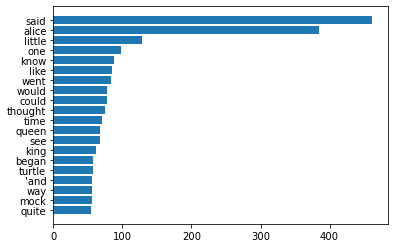

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

n = sorted_word_count[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬 
w = [alice_word_count[key] for key in n] # 20개 단어에 대한 빈도 
plt.barh(range(len(n)),w,tick_label=n) # 수평 막대그래프
plt.show()

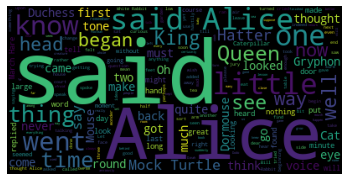

In [11]:
from wordcloud import WordCloud
# 워드 클라우드 이미지 생성
wordcloud = WordCloud()
wordcloud.generate(doc_alice)
plt.axis("off")
plt.imshow(wordcloud) # 이미지를 출력 
plt.show()

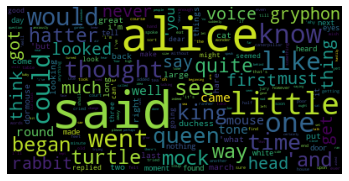

In [12]:
wordcloud = WordCloud(max_font_size=60)
wordcloud.generate_from_frequencies(alice_word_count)
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [13]:
import numpy as np 
from PIL import Image 
# 배경이미지를 불러와서 넘파이 array로 변환 
alice_mask = np.array(Image.open("alice_mask.png")) 
wc = WordCloud(background_color="white", # 배경색 지정 
               max_words=30, # 출력할 최대 단어 수 
               mask=alice_mask, # 배경으로 사용할 이미지 
               contour_width=3, # 테두리 굵기 
               contour_color='steelblue') # 테두리 색 
wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성 
wc.to_file("alice.png") # 필요한 경우 결과를 이미지 파일로 저장 
# 화면에 결과를 출력 
plt.axis("off") 
plt.imshow(wc) 
plt.show() 


FileNotFoundError: [Errno 2] No such file or directory: 'alice_mask.png'

In [ ]:
from konlpy.corpus import kolaw
const_doc = kolaw.open('constitution.txt').read()
print(type(const_doc)) # 가져온 데이터의 type을 확인 
print(len(const_doc)) # 전체 길이 출력
print(const_doc[:100])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [ ]:
from konlpy.tag import Okt
t = Okt()
tokens_const = t.nouns(const_doc) # 형태소 단위로 tokenize 후 명사만 추출
tokens_const = [token for token in tokens_const if len(token) > 1] 
print('토큰의 수:', len(tokens_const))
print('앞 10개의 토큰:')
print(tokens_const[:10])

토큰의 수: 3013
앞 10개의 토큰:
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']


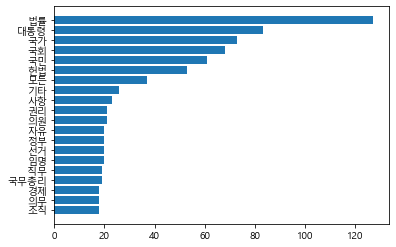

In [ ]:
from matplotlib import font_manager, rc
# 그래프에서 사용할 한글 폰트를 지정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() 
#font_name = 'AppleGothic' # 애플 맥북인 경우
rc('font', family=font_name)

# 단어별 빈도를 담을 딕셔너리 생성
const_word_count = dict() 
for word in tokens_const: 
    const_word_count[word] = const_word_count.get(word, 0) + 1 
# 빈도를 key로 하여 단어를 빈도 역순으로 정렬
sorted_word_count = sorted(const_word_count, key=const_word_count.get, reverse=True) 
    
n = sorted_word_count[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬 
w = [const_word_count[key] for key in n] # 20개 단어에 대한 빈도 
plt.barh(range(len(n)),w,tick_label=n) # 수평 막대그래프
#plt.savefig('const.png', dpi=200)
plt.show()

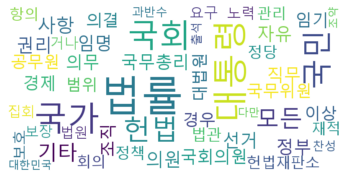

In [ ]:
# WordCloud 객체에 전달할 폰트주소 생성
font_path = 'c:/Windows/Fonts/malgun.ttf'
#font_path = 'AppleGothic' # 애플 맥북인 경우
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100,
    width = 800, # 이미지 너비
    height = 400, # 이미지 높이
    background_color='white', # 이미지 배경색
    max_words=50) # 최대 단어 수
# 원문이 아닌 형태소 분석 결과로부터 워드 클라우드 생성
wordcloud.generate_from_frequencies(const_word_count)
wordcloud.to_file("const.png") # 생성한 이미지를 파일로 저장
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### 카운트 기반의 문서표현

In [ ]:
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\sangu\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
print("리뷰의 수:", len(documents))

리뷰의 수: 2000


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# 앞서와 동일하게 최대 특성의 수를 1,000개로 제한
cv = CountVectorizer(max_features=2000, min_df=5, max_df=0.5)
# 앞서 가져온 리뷰 문서에 대해 fit_transform 적용
reviews_cv = cv.fit_transform(documents)
# 특성 집합의 단어명을 앞에서부터 10개 출력
print(cv.get_feature_names_out()[:10])
# 첫째 리뷰 문서의 앞 10개 특성을 출력
print(reviews_cv[0, :10])

['000' '10' '100' '13' '15' '1995' '1996' '1997' '1998' '1999']
  (0, 1)	10


In [ ]:
print(reviews_cv.toarray()[:5, :5])

[[ 0 10  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


In [ ]:
print(reviews_cv[:5, :5])

  (0, 1)	10


In [ ]:
import pandas as pd
df = pd.read_csv('./data/daum_movie_review.csv')
df.head(5)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


In [ ]:
df.title.value_counts()

신과함께      4947
택시운전사     2322
인피니티 워    2042
범죄도시      1939
곤지암       1547
라라랜드      1150
코코         778
Name: title, dtype: int64

In [ ]:
df.describe()

,rating
count,14725.000000
mean,7.451952
std,3.279778
min,0.000000
25%,6.000000
50%,9.000000
75%,10.000000
max,10.000000


In [ ]:
from konlpy.tag import Okt
okt = Okt()
# 트위터 형태소 분석기를 이용해 명사, 동사, 형용사만을 반환하는 함수 정의
def my_tokenizer(doc):
    return [token for token, pos in okt.pos(doc) 
            if pos in ['Noun', 'Verb', 'Adjective']]
print("나만의 토크나이저 결과:", my_tokenizer(df.review[1]))

나만의 토크나이저 결과: ['몰입', '할수밖에', '없다', '어렵게', '생각', '할', '필요없다', '내', '전투', '참여', '듯', '손', '땀', '이남']


In [ ]:
print(okt.morphs(df.review[1]))

['몰입', '할수밖에', '없다', '.', '어렵게', '생각', '할', '필요없다', '.', '내', '가', '전투', '에', '참여', '한', '듯', '손', '에', '땀', '이남', '.']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# 토크나이저와 특성의 최대 개수를 지정
daum_cv = CountVectorizer(max_features=1000, tokenizer=my_tokenizer)
# 명사만 추출하고 싶은 경우 예: daum_cv = CountVectorizer(tokenizer=okt.nouns)
# review를 특성 벡터로 변환
daum_result = daum_cv.fit_transform(df.review)
print(daum_cv.get_feature_names_out()[:10]) # 특성 집합의 앞 열개 단어 출력

['가' '가는' '가는줄' '가면' '가서' '가슴' '가장' '가족' '가족영화' '가지']


### 토픽모델링으로 주제 찾기 

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space',
              'comp.sys.ibm.pc.hardware', 'sci.crypt']
# 학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
print('Train set size:', len(newsgroups_train.data))

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(newsgroups_train.data)
print(review_cv.shape)

Train set size: 3219
(3219, 2000)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)
lda = LatentDirichletAllocation(n_components = 10, # 추출할 topic의 수 
                                max_iter=5,
                                topic_word_prior=0.1, 
                                doc_topic_prior=1.0, 
                                learning_method='online',
                                n_jobs= -1, # 사용 processor 수 
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print('Shape of review_topics:', review_topics.shape)
print('Sample of review_topics:', review_topics[0])
gross_topic_weights = np.mean(review_topics, axis=0)
print('Sum of topic weights of documents:', gross_topic_weights)
print('Shape of topic word distribution:', lda.components_.shape)

Shape of review_topics: (3219, 10)
Sample of review_topics: [0.015 0.007 0.008 0.829 0.008 0.008 0.02  0.007 0.007 0.091]
Sum of topic weights of documents: [0.082 0.082 0.094 0.109 0.114 0.138 0.086 0.071 0.072 0.152]
Shape of topic word distribution: (10, 2000)


In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(
            ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        )
# 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터
# n_top_words까지
    print()
print_top_words(lda,cv.get_feature_names_out(), 10)

Topic #0: com, article, sandvik, apple, university, kent, science, wrote, islam, frank
Topic #1: image, graphics, file, files, ftp, software, available, program, data, use
Topic #2: com, access, posting, net, digex, article, ibm, internet, like, pat
Topic #3: article, com, don't, keith, nntp, think, host, just, posting, sgi
Topic #4: key, clipper, chip, encryption, government, com, keys, law, escrow, use
Topic #5: scsi, university, nntp, host, thanks, posting, com, know, bit, bus
Topic #6: space, nasa, gov, launch, orbit, center, earth, shuttle, satellite, research
Topic #7: drive, disk, hard, com, controller, drives, dos, problem, tape, floppy
Topic #8: key, public, mail, faq, message, pgp, information, university, group, des
Topic #9: god, people, don't, jesus, just, think, say, believe, does, know



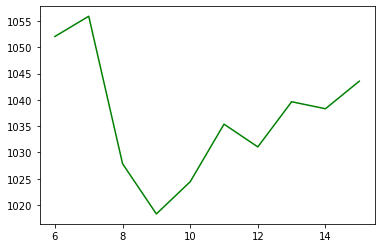

n_components with minimum perplexity: 9


In [ ]:
def test_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1,
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []
    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter,
            topic_word_prior= topic_word_prior, doc_topic_prior=doc_topic_prior, 
            learning_method='batch', n_jobs= -1, random_state=7)
        lda.fit(cv)
        iter_num.append(i)
        per_value.append(lda.perplexity(cv))
    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:", 
      test_perplexity(review_cv, start=6, end=15))

In [ ]:
lda = LatentDirichletAllocation(n_components=8, #추출할 topic의 수를 지정 max_iter=20,
                                topic_word_prior=0.1,
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs=-1,
                                random_state=7)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: graphics, image, mail, file, available, ftp, data, information, files, software
Topic #1: nasa, space, gov, orbit, ___, com, center, posting, earth, research
Topic #2: com, keith, morality, caltech, host, nntp, objective, sgi, drive, posting
Topic #3: com, article, jesus, know, just, god, don't, posting, host, nntp
Topic #4: people, god, don't, think, does, say, believe, just, like, way
Topic #5: scsi, drive, card, com, ide, bus, controller, use, bit, windows
Topic #6: space, article, access, com, posting, nntp, university, host, just, digex
Topic #7: key, encryption, clipper, chip, com, government, keys, use, security, public



In [ ]:
#!pip install gensim

In [ ]:
#!pip install pyldavis

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
cachedStopWords = stopwords.words("english")
RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) # 영어 불용어를 가져옴
def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2] 
    return words
texts = [tokenizer(news) for news in newsgroups_train.data]

In [ ]:
from gensim.corpora.dictionary import Dictionary
# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))
# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n = 2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))
# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts] 
print('#Number of unique tokens: %d' % len(dictionary)) 
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 46466
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 3219


In [ ]:
from gensim.models import LdaModel
num_topics = 8
passes = 5
model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

In [ ]:
model.print_topics(num_words=10)

[(0,
  '0.013*"com" + 0.012*"would" + 0.010*"article" + 0.010*"card" + 0.009*"nntp" + 0.009*"host" + 0.009*"posting" + 0.008*"system" + 0.008*"keith" + 0.008*"university"'),
 (1,
  '0.017*"god" + 0.012*"one" + 0.011*"people" + 0.009*"would" + 0.009*"jesus" + 0.008*"com" + 0.008*"say" + 0.006*"christian" + 0.006*"bible" + 0.006*"believe"'),
 (2,
  '0.031*"com" + 0.027*"posting" + 0.026*"host" + 0.026*"nntp" + 0.019*"access" + 0.015*"article" + 0.014*"university" + 0.012*"digex" + 0.010*"net" + 0.010*"cwru"'),
 (3,
  '0.032*"space" + 0.018*"nasa" + 0.010*"gov" + 0.007*"orbit" + 0.006*"research" + 0.006*"earth" + 0.006*"launch" + 0.005*"first" + 0.005*"shuttle" + 0.005*"data"'),
 (4,
  '0.015*"would" + 0.014*"people" + 0.011*"com" + 0.010*"one" + 0.008*"like" + 0.007*"get" + 0.007*"article" + 0.007*"government" + 0.007*"think" + 0.007*"right"'),
 (5,
  '0.022*"key" + 0.015*"encryption" + 0.013*"chip" + 0.013*"clipper" + 0.010*"com" + 0.009*"use" + 0.008*"keys" + 0.008*"system" + 0.007*"dr

In [ ]:
 print("#topic distribution of the first document: ", model.get_document_topics(corpus)
[0])

#topic distribution of the first document:  [(0, 0.15090123), (1, 0.6031323), (6, 0.2426202)]


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
# LDA 모형을 pyLDAvis 객체에 전달
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

C:\Users\sangu\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.167620  0.042053       1        1  18.713844
5      0.068452  0.131736       2        1  16.310581
7      0.124927  0.016658       3        1  14.811461
4     -0.075573  0.033361       4        1  13.429894
3      0.107848  0.001626       5        1  12.446376
0      0.023261 -0.083507       6        1  10.405688
6     -0.084520 -0.007936       7        1   8.152190
2      0.003225 -0.133990       8        1   5.729965, topic_info=        Term         Freq        Total Category  logprob  loglift
538    space  1533.000000  1533.000000  Default  30.0000  30.0000
834      key  1300.000000  1300.000000  Default  29.0000  29.0000
20       com  3703.000000  3703.000000  Default  28.0000  28.0000
200      god  1153.000000  1153.000000  Default  27.0000  27.0000
70   posting  1732.000000  1732.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
289     like   127.889830  1663.500215   Topic8  -5.0142   0.2940
92     think   119.618152  1329.765236   Topic8  -5.0810   0.4510
116   anyone   104.015251   744.616905   Topic8  -5.2208   0.8911
304     know   101.045274  1486.391369   Topic8  -5.2498   0.1709
188     case    89.734054   514.281883   Topic8  -5.3685   1.1135

[503 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1359      2  0.081635      128
1359      3  0.854026      128
1359      4  0.018839      128
1359      5  0.037678      128
153       1  0.055294     1993
...     ...       ...      ...
704       5  0.007843      zoo
704       6  0.972586      zoo
704       8  0.007843      zoo
705       4  0.014601  zoology
705       6  0.978273  zoology

[2103 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 8, 5, 4, 1, 7, 3])